In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 39)

In [10]:
url = 'https://raw.githubusercontent.com/ryanrodr/ml-heart-disease/main/dados/heart_statlog_cleveland_hungary_final.csv'

df = pd.read_csv(url)

In [11]:
df.shape

(1190, 12)

In [12]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [13]:
tb_frequencia_sexo = pd.crosstab(index=df['sex'], columns=df['target'])\
                .rename(columns={0: 'Normal', 1: 'Doença'})\
                    .rename_axis('Sexo')\
                        .rename(index={0: 'Feminino', 1: 'Masculino'})

tb_frequencia_sexo

target,Normal,Doença
Sexo,,
Feminino,211,70
Masculino,350,559


In [14]:
tb_frequencia_sexo = tb_frequencia_sexo.reset_index()\
                                        .melt(id_vars='Sexo',
                                                value_vars=['Normal', 'Doença'],
                                                var_name='Condição',
                                                value_name='Frequência')
tb_frequencia_sexo

,Sexo,Condição,Frequência
0,Feminino,Normal,211
1,Masculino,Normal,350
2,Feminino,Doença,70
3,Masculino,Doença,559


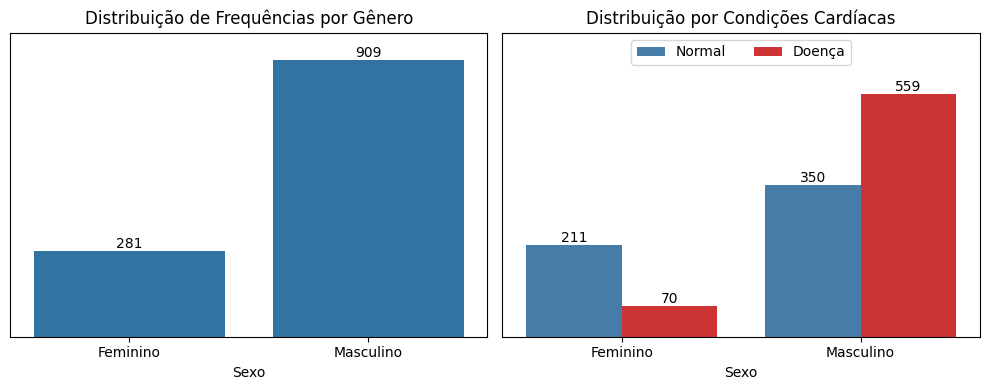

In [15]:
# Definir a paleta personalizada
custom_palette = {
    'Normal': sns.color_palette("Set1")[1],  # Azul
    'Doença': sns.color_palette("Set1")[0]   # Vermelho
}

# Definir o tamanho da figura (em polegadas)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 linha, 2 colunas

# Primeiro gráfico - Distribuição de Frequências por Gênero
ax1 = axes[0]
sns.countplot(x='sex', data=df, ax=ax1, color='C0')
ax1.set_title('Distribuição de Frequências por Gênero')
ax1.set_ylim(0, 1000)

for container in ax1.containers:
    ax1.bar_label(container)

ax1.set_xlabel("Sexo")
ax1.set_facecolor('none')
ax1.grid(False)
ax1.set_yticks([])
ax1.set_ylabel("")

# Configurar rótulos do eixo x
sex_labels = {0: 'Feminino', 1: 'Masculino'}
ax1.set_xticklabels([sex_labels[x] for x in sorted(df['sex'].unique())])

# Segundo gráfico - Distribuição por Condições Cardíacas
ax2 = axes[1]
sns.barplot(data=tb_frequencia_sexo, x='Sexo', y='Frequência', hue='Condição', palette=custom_palette, ax=ax2)
ax2.set_title('Distribuição por Condições Cardíacas')
ax2.set_ylim(0, 700)

# Adicionar rótulos de dados
for container in ax2.containers:
    ax2.bar_label(container)

ax2.set_facecolor('none')
ax2.grid(False)
ax2.set_yticks([])
ax2.set_ylabel("")

# Ajustar a legenda para que ela fique centralizada abaixo do gráfico
legenda = ax2.legend(loc='upper center', ncol=2)
legenda.get_frame().set_facecolor('none')

plt.tight_layout()

# Salvar o gráfico na localização especificada com resolução ajustada (dpi)
output_path = "/home/ryanr/Documentos/ml-heart-disease/imagens/grafico1.png"
plt.savefig(output_path, dpi=300)  # Ajuste o dpi conforme necessário

plt.show()